## Splitting Outliers

### Importing Data

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

customer_metrics = pd.read_csv('../data/processed/customer_metrics.csv')

In [23]:
customer_metrics.head()

,Customer ID,TotalSpent,Frequency,FirstInvoiceDate,LastInvoiceDate,CustomerLifespan,Recency
0,12346.0,169.36,2,2010-03-02 13:08:00,2010-06-28 13:53:00,118,164
1,12347.0,1323.32,2,2010-10-31 14:20:00,2010-12-07 14:57:00,37,2
2,12348.0,221.16,1,2010-09-27 14:59:00,2010-09-27 14:59:00,1,73
3,12349.0,2221.14,2,2010-04-29 13:20:00,2010-10-28 08:23:00,181,42
4,12351.0,300.93,1,2010-11-29 15:23:00,2010-11-29 15:23:00,1,10


### Visualizing Segmentation Features

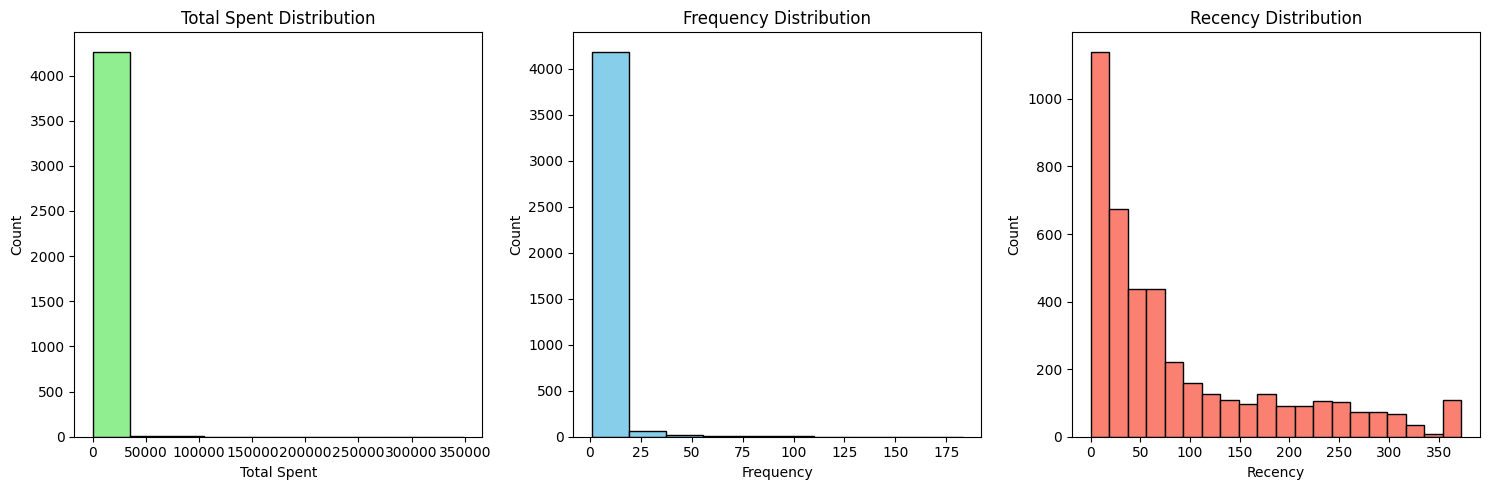

In [24]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1) #r,c,current_col
plt.hist(customer_metrics['TotalSpent'], bins=10, color='lightgreen', edgecolor='black')
plt.title('Total Spent Distribution')
plt.xlabel('Total Spent')
plt.ylabel('Count')

plt.subplot(1, 3, 2)
plt.hist(customer_metrics['Frequency'], bins=10, color='skyblue', edgecolor='black')
plt.title('Frequency Distribution')
plt.xlabel('Frequency')
plt.ylabel('Count')

plt.subplot(1, 3, 3)
plt.hist(customer_metrics['Recency'], bins=20, color='salmon', edgecolor='black')
plt.title('Recency Distribution')
plt.xlabel('Recency')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

### Visualizing Feature Distribution

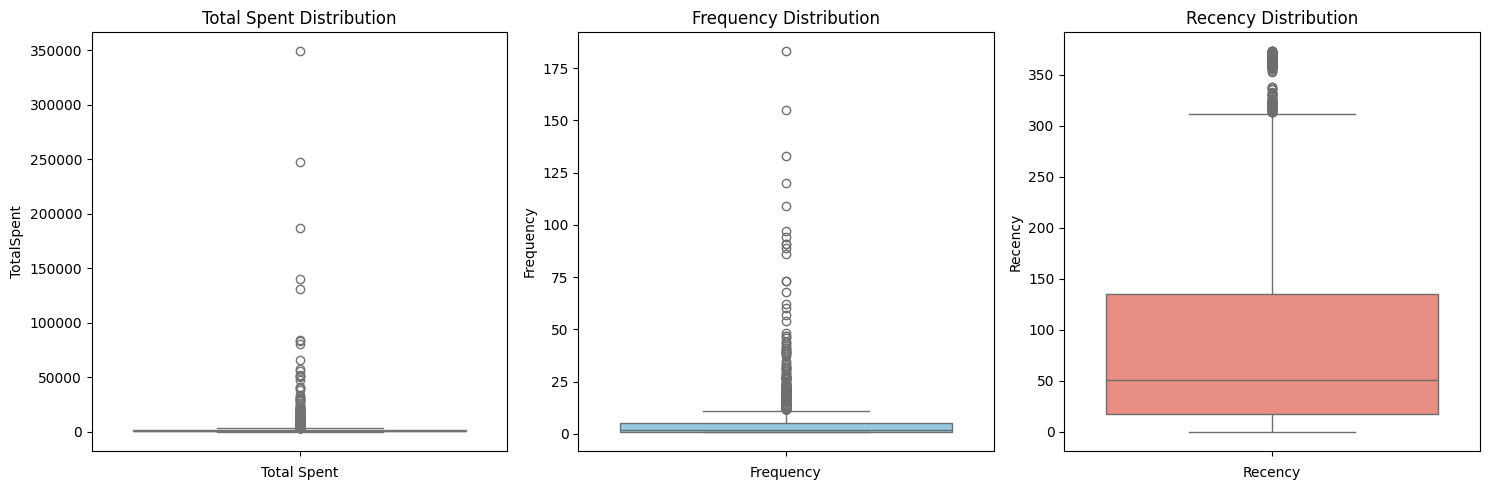

In [25]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(y=customer_metrics['TotalSpent'], color='lightgreen')
plt.title('Total Spent Distribution')
plt.xlabel('Total Spent')

plt.subplot(1, 3, 2)
sns.boxplot(y=customer_metrics['Frequency'], color='skyblue')
plt.title('Frequency Distribution')
plt.xlabel('Frequency')

plt.subplot(1, 3, 3)
sns.boxplot(y=customer_metrics['Recency'], color='salmon')
plt.title('Recency Distribution')
plt.xlabel('Recency')

plt.tight_layout()
plt.show()

### Splitting Total Spent & Purchase Frequency

In [26]:
M_Q1 = customer_metrics['TotalSpent'].quantile(0.25) 
M_Q3 = customer_metrics['TotalSpent'].quantile(0.75)

M_IQR = M_Q3 - M_Q1
total_spent_outliers_df = customer_metrics[(customer_metrics['TotalSpent'] > (M_Q3 + 1.5 * M_IQR)) |
                                           (customer_metrics['TotalSpent']  < (M_Q1 - 1.5 * M_IQR))].copy()
total_spent_outliers_df.describe()

,Customer ID,TotalSpent,Frequency,CustomerLifespan,Recency
count,423.000000,423.000000,423.000000,423.000000,423.000000
mean,15103.040189,12188.101740,17.167849,296.425532,30.035461
std,1728.661406,25830.851045,19.729755,89.095367,51.541004
min,12357.000000,3802.040000,1.000000,1.000000,0.000000
25%,13622.000000,4605.940000,8.000000,258.000000,3.000000
50%,14961.000000,6191.320000,12.000000,338.000000,13.000000
75%,16692.000000,10273.235000,18.000000,359.000000,31.000000
max,18260.000000,349164.350000,183.000000,373.000000,364.000000


In [27]:
F_Q1 = customer_metrics['Frequency'].quantile(0.25) 
F_Q3 = customer_metrics['Frequency'].quantile(0.75)

F_IQR = F_Q3 - F_Q1
purchase_frequency_outliers_df = customer_metrics[(customer_metrics['Frequency'] > (F_Q3 + 1.5 * F_IQR)) |
                                           (customer_metrics['Frequency']  < (F_Q1 - 1.5 * F_IQR))].copy()
purchase_frequency_outliers_df.describe()

,Customer ID,TotalSpent,Frequency,CustomerLifespan,Recency
count,279.000000,279.000000,279.000000,279.000000,279.000000
mean,15352.655914,14409.714932,23.810036,327.465950,16.089606
std,1748.429987,31381.736785,21.932937,55.152419,26.589117
min,12437.000000,1094.390000,12.000000,77.000000,0.000000
25%,13800.000000,4331.560500,13.000000,311.500000,2.000000
50%,15465.000000,6615.770000,17.000000,352.000000,7.000000
75%,16828.500000,11692.405000,23.000000,363.000000,19.000000
max,18260.000000,349164.350000,183.000000,373.000000,211.000000


In [28]:
non_outliers_df = customer_metrics[(~customer_metrics.index.isin(total_spent_outliers_df.index)) &
                                   (~customer_metrics.index.isin(purchase_frequency_outliers_df.index))]
non_outliers_df.describe()

,Customer ID,TotalSpent,Frequency,CustomerLifespan,Recency
count,3809.000000,3809.000000,3809.000000,3809.000000,3809.000000
mean,15376.482804,885.502197,2.863481,114.588081,97.082174
std,1693.199806,817.672283,2.243748,123.055867,98.111495
min,12346.000000,1.550000,1.000000,1.000000,0.000000
25%,13912.000000,279.910000,1.000000,1.000000,22.000000
50%,15389.000000,588.050000,2.000000,69.000000,58.000000
75%,16854.000000,1269.050000,4.000000,220.000000,154.000000
max,18287.000000,3788.210000,11.000000,373.000000,373.000000


### Distribution After Split

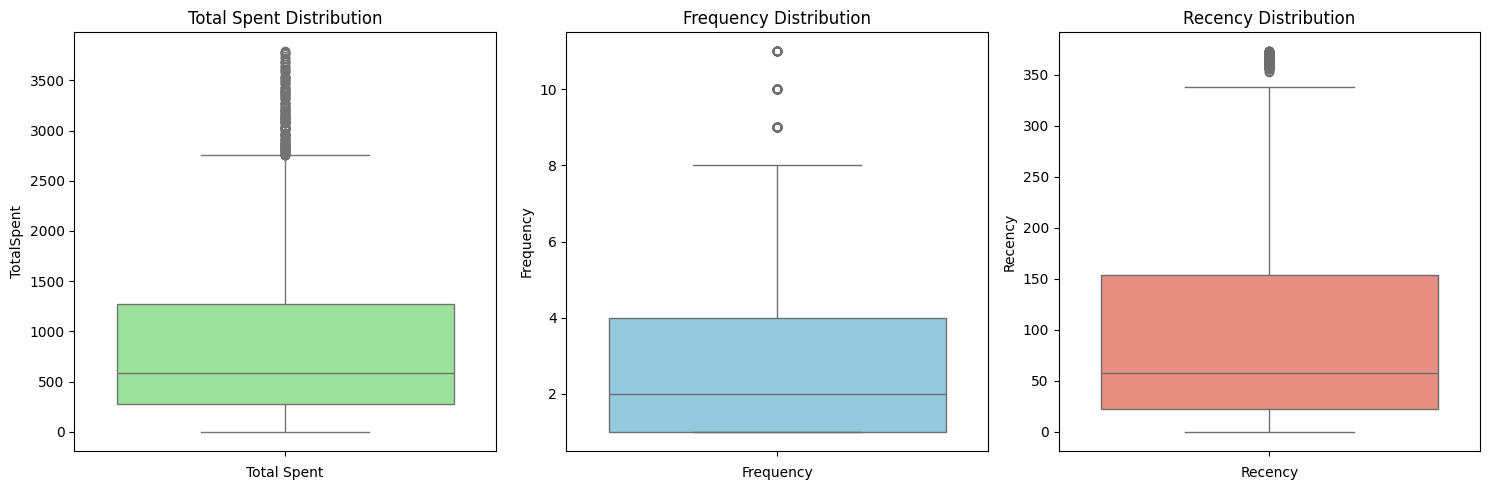

In [29]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(y=non_outliers_df['TotalSpent'], color='lightgreen')
plt.title('Total Spent Distribution')
plt.xlabel('Total Spent')

plt.subplot(1, 3, 2)
sns.boxplot(y=non_outliers_df['Frequency'], color='skyblue')
plt.title('Frequency Distribution')
plt.xlabel('Frequency')

plt.subplot(1, 3, 3)
sns.boxplot(y=non_outliers_df['Recency'], color='salmon')
plt.title('Recency Distribution')
plt.xlabel('Recency')

plt.tight_layout()
plt.show() 

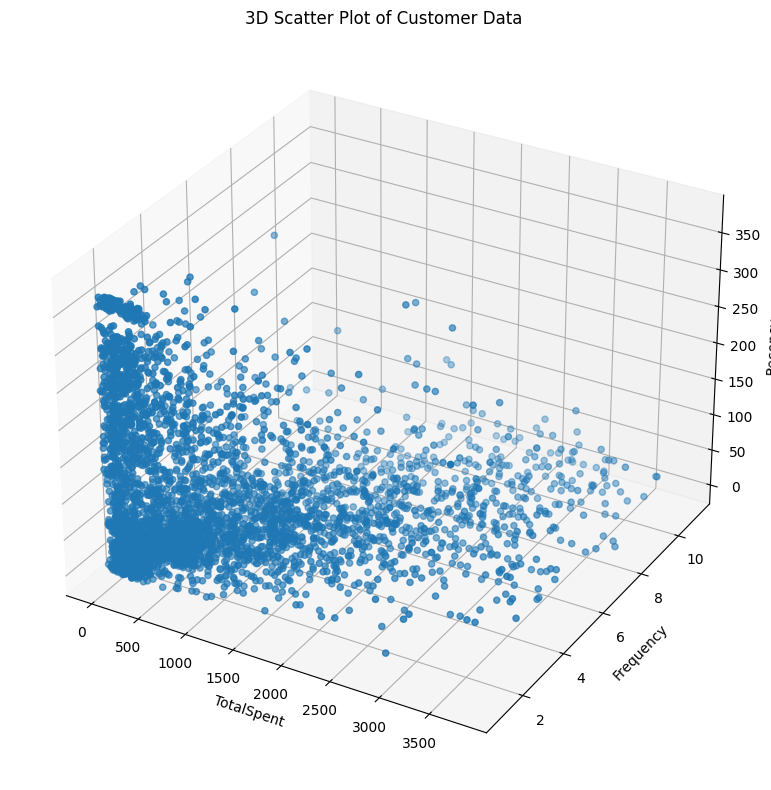

In [30]:
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(projection='3d')
scatter = ax.scatter(
  non_outliers_df['TotalSpent'],
  non_outliers_df['Frequency'],
  non_outliers_df['Recency']
)
ax.set_xlabel('TotalSpent')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')
ax.set_title('3D Scatter Plot of Customer Data')

plt.tight_layout()
plt.show()

### Exporting Data

In [31]:
non_outliers_df.to_csv('../data/processed/customer_metrics_without_outliers.csv', index=False)
total_spent_outliers_df.to_csv('../data/processed/high_value_outliers.csv', index=False)
purchase_frequency_outliers_df.to_csv('../data/processed/high_freq_outliers.csv', index=False)